# Dust Extinction and Photometry 
## Dr. Larson
## Grace Eliason
## Spring 2017

-----
## Introduction and Goals

Photometry is the study of luminous objects through filters. In this specific study, we will be using filters to examine not only luminuous bodies but also the dust that surrounds them. By noting the dust extinction that occurs through our filters, we can constrain the properties of our system. There are two ways in which we can approach this: 

- by observing the background source to understand the properties of the dust surrounding it, or 

- by observing variations in the surounding dust to understand properties of the background source. 

This code will be focusing on utilizing filters to maximize our understanding of dust extinction. This will be accomplished by manipuating the magnitude at which we observe the background sources before and after dust extinction. Because magnitude is a logatrithmic function, finding the difference between two filters can allows us to use ratios, thus ridding our equations of distances and radii. Finally, by plotting these ratios versus temperature, we can optimize our filter usage on stars with different temperatures or dust extinctions. 

This specific portion of the project has been broken down into three parts: 

1) The Ideal Background Source

2) The Real Background Source

3) The Real Background Source with Dust Extinction

This separation will help in taking a step-by-step approach to the code, the theory, and the application of filter usage and dust extinction curves. 

In [3]:
## import all the nice things we're using for our plots and maths

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy import interpolate 
%matplotlib inline 

-----
## Part 1: The Ideal Background Source

### _Theory and Code_

This will be like looking at space and seeing ideal fluxes, or rather, looking at luminous objects that follow the __Planck blackbody radiation curve__ ideally. We will be looking at our objects through __filters__, otherwise known as the study of __photometry__. If we compare these fluxes to our baseline flux for each filter, we get a __magnitude__. This magnitude is defined as: 

$$ m = -2.5 \log \frac{F_{\lambda}}{F_{\lambda 0}} $$

where $m$ is magnitude, $F_{\lambda}$ is wavelength-dependent flux, and $f_{\lambda 0}$ is baseline flux.

Each filter has its own specific __baseline flux__ that is dependent upon the __wavelengths__ which it observes. These quantities are given and can be seen in the getfilter function below.  

What we're trying to do is maximize the magnitude at which we observe these luminous objects. To do this, we're going to have to model different types of filters over all temperatures on the main sequence. 

----------

Here, we define our __getfilter__ function. This will allow us to call the specific type of filter we want. Each filter represents a small span of wavelengths on the electromagnetic spectrum, represented by __lambda_eff__ plus or minus __halfwidth__. The baseline intensity of each filter is given as __I0__. 

In [4]:
def getfilter(band):
    
    if band=='Ks':          ## red
        lambda_eff=2.159         # m^-6
        halfwidth=0.262/2.0      # m^-6
        I0=4.283E-14             # Wm^-2m^-6
    
    elif band=='H':
        lambda_eff=1.662
        halfwidth=0.251/2.0
        I0=1.133E-13
    
    elif band=='J': 
        lambda_eff=1.235
        halfwidth=0.162/2.0 
        I0=3.129E-13
    
    elif band=='U':
        lambda_eff=0.365
        halfwidth=0.066/2.0
        I0=4.19E-12
    
    elif band=='B':            ## blue
        lambda_eff=0.445
        halfwidth=0.094/2.0
        I0=6.60E-12
    
    elif band=='V':            ## green
        lambda_eff=0.551
        halfwidth=0.088/2.0
        I0=3.61E-12
    
    elif band=='R': 
        lambda_eff=0.658
        halfwidth=0.138/2.0
        I0=2.25E-12
    
    elif band=='I':
        lambda_eff=0.806
        halfwidth=0.149/2.0
        I0=1.22E-12
    
    return lambda_eff, halfwidth, I0    ## because we need these as inputs to our next functions

Let's see what the intensity versus wavelength plots look like, using the first filter as an example: 

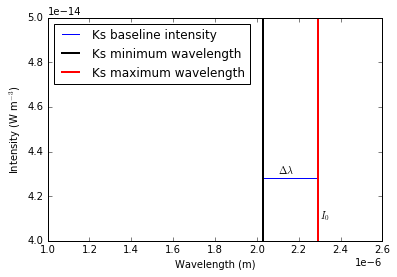

In [5]:
lambda_eff, halfwidth, I0 = getfilter('Ks')

x = np.arange((lambda_eff-halfwidth)*1e-6, (lambda_eff + halfwidth)*1e-6, 1e-9)

def I_arr(x, I0): 
    I_array = [] 
    
    for i in x:
        I = I0
        I_array = np.append(I_array, I)
    return  I_array
        
x1 = (lambda_eff-halfwidth)*1e-6
x2 = (lambda_eff + halfwidth)*1e-6
plt.plot(x, I_arr(x, I0), label='Ks baseline intensity')
Ks_mini = plt.axvline(x1, ymin=0, ymax = 1, linewidth=2, color='k', label='Ks minimum wavelength')
Ks_maxi = plt.axvline(x2, ymin=0, ymax = 1, linewidth=2, color='r', label='Ks maximum wavelength')
plt.ylim((4e-14, 5e-14))
plt.xlim((1e-6, 2.6e-6))
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.legend(loc='best')
plt.text(2.1e-6, 4.3e-14, r'$\Delta\lambda$')
plt.text(2.3e-6, 4.1e-14, r'$I_{0}$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

So, to calculate our __baseline flux__, we simply multiply the baseline intensity by the range of wavelengths it covers: 

$$ F_{\lambda 0} = I_{\lambda 0}\Delta\lambda $$

Where flux is usually given in Watts/m$^2$, intensity in Watts/m$^3$, and wavelength in m. 


-------
Here, we define our blackbody curve function as __ planck__.

In [6]:
def planck(x, T):
    
    h = 6.626e-34
    c = 3.0e+8
    k = 1.38e-23

    a0 = 2.0*h*c**2
    b0 = (h*c)/(x*k*T)
    intensity = a0 / ((x**5) * (np.exp(b0) - 1.0) )
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9) ## for our "x" value in the function
temperatures = np.arange(2500, 38000, 100) ## for our "T" value in the function; the full range of Main Sequence temps

Now let's check if it worked and visualize what we're trying to do here: 

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


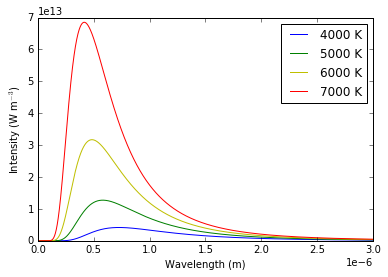

In [7]:
plt.plot(wavelengths, planck(wavelengths, 4000),'b', label='4000 K')
plt.plot(wavelengths, planck(wavelengths, 5000),'g', label='5000 K')
plt.plot(wavelengths, planck(wavelengths, 6000), 'y',label='6000 K')
plt.plot(wavelengths, planck(wavelengths, 7000), 'r',label='7000 K')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W m$^{-3}$)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

It seems like the blackbody curves themselves are good. Now let's see how our wavelength intervals for each filter can be incorporated into this. Let's again use the Ks filter's wavelength range: 

/Users/graceeliason/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


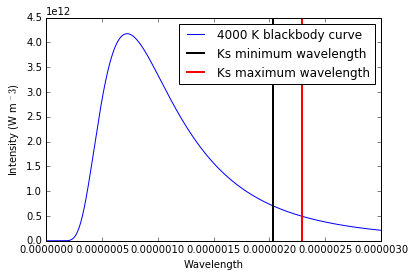

In [8]:
lambda_eff, halfwidth, I0 = getfilter('Ks')

planck_4000 = plt.plot(wavelengths, planck(wavelengths, 4000),'b', label='4000 K blackbody curve')
plt.ylabel('Intensity (W m$^-3$)')
plt.xlabel('Wavelength')

x1 = (lambda_eff-halfwidth)*10**(-6)
x2 = (lambda_eff+halfwidth)*10**(-6)

Ks_mini = plt.axvline(x1, ymin=0, ymax = 1, linewidth=2, color='k', label='Ks minimum wavelength')
Ks_maxi = plt.axvline(x2, ymin=0, ymax = 1, linewidth=2, color='r', label='Ks maximum wavelength')

plt.legend(loc='best')

The area under the blackbody curve will give us the __ideal flux__ to put into our magnitude function, just as it did with the filter; except this time, we must __integrate__: 

$$ F_{\lambda} = \int_{\lambda_{min}}^{\lambda_{max}} I(\lambda) d\lambda $$

Where $f$ is the ideal flux, $I(\lambda)$ is the planck curve, and $\lambda_{min}$ and $\lambda_{max}$ are designated by our filter. 

So between this black and this red line is where we're going to integrate the blackbody curve. Notice that this is only at one specific main sequence temperature - we'll be doing this for __many temperatures__, so, in the end, we should get an __array__.  

-----
Here we define our ideal magnitude function as __ideal_mag__. Its end goal is to get the magnitude (m = -2.5 log (f/fx)) for our given filter over a specific range of wavelengths. This magnitude is ideal because it depends only on filter and blackbody curve, not the actual data. (That will come later!)

We start off by setting the blackbody curve's integral limits __a__ and __b__ to the minimum and maximum wavelengths that can be observed through the chosen filter. 

Then, we find the baseline flux __flux_x__ to input into our magnitude function by multiplying the baseline intensity by the range of filter wavelengths. 

We then create a __flux_array__ and a __magnitude_array__ to collect our blackbody fluxes and corresponding magnitudes. These are arrays because the value changes as temperature change, i.e. each value in the array represents the value at a specific main sequence temperature. 

The __temperature for-loop__ takes in a specified temperature on the main sequence and calculates the flux of the blackbody curve at that temperature over the filter-specific range of wavelengths. This is done by calling the planck function; then, the area underneath this curve is found using the __quad__ integration tool.  

And, finally, the __flux for-loop__ takes each flux calculated in the previous for-loop and inputs it into the given magnitude function. 

In [9]:
def ideal_mag(lambda_eff, halfwidth, I0):    ## takes in the following arguments for certain filters
     
    a = (lambda_eff - halfwidth)*1e-6   ## upper integral limit; *1e-6 to get from microns to meters
    b = (lambda_eff + halfwidth)*1e-6   ## lower integral limit; *1e-6 to get from microns to meters
    
    flux_x = I0*2*halfwidth*1e-2         ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
    
    flux_array = []                     ## just defining an array to put our calculated fluxes in
    magnitude_array = []                ## and one for our magnitudes as well 
    
    for t in temperatures:              ## iterating through all possible temperatures to get flux
        flux = quad(planck, a, b, args=(t))[0]    ## quad takes the integral from a to b, and I called the planck function because that's what we're integrating 
        flux = flux/(4*np.pi*(3.086e17)**2)       ## NOTE that 'planck' is divided by 4*pi*(10pc)^2 to get a more realistic flux (stars are far away from us)
        flux_array = np.append(flux_array, flux)  ## this collects our flux values in an array
        
    for f in flux_array:                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
        magnitude_array = np.append(magnitude_array, magnitude)     ## again calculating 
    
    return magnitude_array

---
### _Results and Applications_

Now that we have all the functions we need, we're going to apply them to some actual filter data. NOTE: This is for an ideal filter with no dust extinction.

In [10]:
lambda_eff, halfwidth, I0 = getfilter('Ks') ## calling the getfliter function to specify filter

Ks_magnitudes = ideal_mag(lambda_eff, halfwidth, I0) ## calling the planck_mag function using our band-specific variables

In [11]:
lambda_eff, halfwidth, I0 = getfilter('B') ## calling the getfliter function to specify filter

B_magnitudes = ideal_mag(lambda_eff, halfwidth, I0)

In [12]:
lambda_eff, halfwidth, I0 = getfilter('V') ## calling the getfliter function to specify filter

V_magnitudes = ideal_mag(lambda_eff, halfwidth, I0)

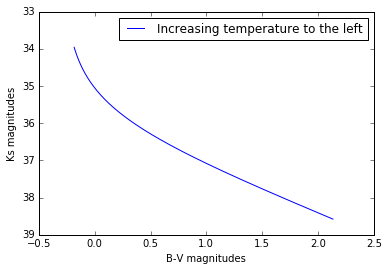

In [13]:
B_minus_V = B_magnitudes - V_magnitudes ## taking the difference between the B and V magnitudes to plot against the Ks magnitudes 

magnitude_plot = plt.plot(B_minus_V, Ks_magnitudes, label='Increasing temperature to the left') ## plotting them against each other, 
plt.ylabel('Ks magnitudes')
plt.xlabel('B-V magnitudes')
plt.gca().invert_yaxis() ## inverting the y-axis to show and increasing temperature
plt.legend(loc='upper right')



-----
## Part 2: The Real Background Source


### _Theory and Code_ 

Now we recognize that what we see will not exactly follow the blackbody curve. This is where the observed data comes in. Using data from http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html, we can find the __actual observed fluxes__, as opposed to the ideal fluxes, as we did prior. 

The main difference here is that we're __multiplying the planck blackbody curve by the filter data before integrating it__. We keep the baseline filter intensity and wavelength range the same because they are instrinsic properties of the filters themselves. This will slighty alter our magnitude function to: 

$$ m = -2.5 \log \frac{W_{\lambda}F_{\lambda}}{F_{\lambda 0}} $$

Where $W_{\lambda}$ is the observed data, $F_{\lambda}$ is the Planck flux, and $F_{\lambda 0}$ is the baseline flux observable by the filter.  

-----

The data from this webpage has been manually-entered below. Anything with the __ _wav__ extension represents wavelengths in microns; anything with the __ _rsr__ extension represents relative spectral response; and, as can be assumed, J represents the __J-band filter__, H represents the __H-band filter__, and K represents the __Ks-band filter__. 


In [14]:

J_wav = [1.062, 1.066,1.07,1.075,1.078,1.082,1.084,1.087,1.089,1.093,1.096,1.102,1.105,1.107,1.109,
         1.112,1.116,1.117,1.12,1.123,1.128,1.129,1.132,1.134,1.138,1.14,1.143,1.147,1.154,1.159,1.164
         ,1.167,1.17,1.173,1.175,1.179,1.182,1.186,1.188,1.192,1.195,1.199,1.202,1.209,1.216,1.221,1.227,1.231,1.236
         ,1.24,1.244,1.247,1.253,1.255,1.258,1.26,1.265,1.27,1.275,1.279,1.286,1.292,1.297,1.302,1.305,1.307,1.31
         ,1.313,1.316,1.319,1.323,1.326,1.33,1.333,1.334,1.336,1.339,1.343,1.346,1.349,1.353,1.355,1.36,1.363,1.37
         ,1.373,1.377,1.383,1.388,1.392,1.395,1.396,1.397,1.398,1.4,1.401,1.402,1.404,1.406,1.407,1.41,1.412,1.416
         ,1.421,1.426,1.442,1.45]
J_rsr = [0,4.07E-04,1.54E-03,2.67E-03,5.51E-03,1.23E-02,2.03E-02,3.06E-02,4.05E-02,5.15E-02,5.64E-02,7.18E-02
         ,0.273603,0.340997,0.358446,0.380134,0.330668,0.239548,0.250062,0.283301,0.258233,0.251474,0.538119
         ,0.223168,0.536893,0.110203,0.529207,0.26194,0.320155,0.1743,0.607031,0.617933,0.676289,0.72794,0.746531
         ,0.830404,0.790307,0.809605,0.836888,0.835984,0.749936,0.708013,0.698759,0.704854,0.700382,0.732765,0.705725
         ,0.842431,0.921873,0.952505,0.967585,0.959508,0.922697,0.892978,0.852943,0.802308,0.750078,0.678072,0.652417
         ,0.638754,0.642413,0.64856,0.68238,0.752903,0.775942,0.811828,0.777008,0.72103,0.952459,0.855137,0.841401
         ,1,0.894736,0.854912,0.537894,0.279866,0.906532,0.689345,0.553327,0.243177,1.44E-02,1.89E-04,4.01E-02
         ,4.54E-03,3.20E-04,3.72E-02,5.38E-04,0,1.44E-04,3.30E-03,3.14E-04,8.48E-03,2.54E-02,0.118446,1.36E-04
         ,6.10E-05,5.21E-02,1.04E-02,4.78E-02,4.20E-04,2.37E-03,5.26E-03,8.65E-03,7.29E-04,3.48E-04,3.78E-04,0]

H_wav = [1.289,1.315,1.341,1.368,1.397,1.418,1.44,1.462,1.478,1.486,1.493,1.504,1.515,1.528,1.539,1.546,1.551,1.556
         ,1.565,1.572,1.577,1.583,1.592,1.597,1.602,1.613,1.619,1.628,1.633,1.642,1.648,1.657,1.659,1.671,1.684
         ,1.701,1.715,1.727,1.739,1.746,1.751,1.753,1.756,1.764,1.775,1.785,1.79,1.796,1.803,1.81,1.813,1.818,1.828
         ,1.835,1.85,1.871,1.893,1.914]
H_rsr = [0,5.92E-08,1.27E-07,0,0,1.71E-05,5.11E-04,2.77E-03,8.09E-03,2.87E-02,8.71E-02,0.201449,0.438159,0.686357
         ,0.818076,0.882073,0.911825,0.926872,0.929288,0.872747,0.856619,0.882556,0.918084,0.926654,0.907594
         ,0.925974,0.920496,0.924198,0.923533,0.941788,0.949134,0.980658,0.993744,1,0.956052,0.924116,0.98212
         ,0.991589,0.988683,0.979168,0.968184,0.93704,0.918998,0.842264,0.667111,0.269402,0.45163,0.173062,0.107726
         ,7.07E-02,5.11E-03,2.00E-02,3.92E-04,1.53E-06,5.95E-05,0,3.05E-05,0]

K_wav = [1.9,1.915,1.927,1.934,1.939,1.948,1.957,1.962,1.969,1.976,1.981,
         1.989,1.99,1.998,2.008,2.014,2.019,2.028,2.037,2.045,2.061,2.072,2.075,2.082,2.089,2.099,2.106,2.113,2.12,2.124,2.138,2.145,2.155,
         2.169,2.176,2.185,2.197,2.208,2.213,2.218,2.232,2.237,2.248,2.256,2.26,2.263,2.265,2.27,2.272,2.276,2.277,2.281,2.284,2.286,2.291, 
         2.293,2.295,2.297,2.299,2.306,2.311,2.316,2.32,2.325,2.328,2.335,2.339,2.344,2.346,2.352,2.361,2.363,2.37,2.375,2.384,2.399]
K_rsr = [0,8.16E-06,1.61E-05,1.59E-04,4.95E-04,5.38E-03,1.19E-02,1.97E-02,4.22E-02,8.73E-02,0.152759,
         0.248173,0.190245,0.233884,0.294551,0.398217,0.336603,0.620746,0.764986,0.746412,0.625063,0.725492,0.689468,0.787906,0.818135,0.822833,0.863294,
         0.877829,0.854895,0.895329,0.918862,0.926769,0.926657,0.900943,0.922819,0.842755,0.945854,0.980363,0.987926,0.984788,0.964659,0.981633,0.983449,
         0.961316,0.979226,1,0.963168,0.981193,0.968068,0.910892,0.982136,0.889606,0.891766,0.94238,0.840424,0.804239,0.70767,0.657619,0.560736,0.443653,
         0.348239,0.230228,0.162597,0.135967,9.21E-02,6.24E-02,4.31E-02,3.40E-02,3.10E-02,1.18E-02,6.83E-03,7.49E-04,3.00E-03,2.10E-03,4.06E-04,0]


Let's see what this looks like by using the H-band as an example: 

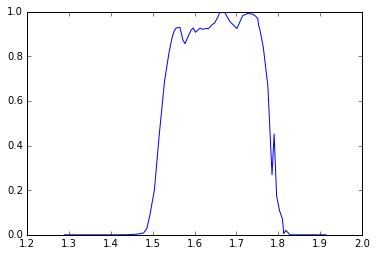

In [15]:
plt.plot(H_wav, H_rsr)

-------

It is important to note that our wavelength ranges were given to us in __microns__. To correct our planck function for this, I'll simply create a second planck function called __planck2__.

In [16]:
## creating a second planck curve that will take in MICRONS as opposed to meters

def planck2(x, T):
    
    h = 6.626e-34      ## J*s
    c = 3.0e+8         ## m/s
    k = 1.38e-23       ## J/K

    a0 = 2.0*h*c**2
    b0 = (h*c)/((x*1e-6)*k*T)
    intensity = a0 / (((x*1e-6)**5) * (np.exp(b0) - 1.0) )
    return intensity

wavelengths2 = np.arange(1, 3, 1e-3) ## for our new wavelengths IN MICRONS
temperatures = np.arange(2500, 38000, 100) ## for our "T" value in the function; the full range of Main Sequence temps

And, to test our planck again, let's just choose a temperature at which to plot it. 

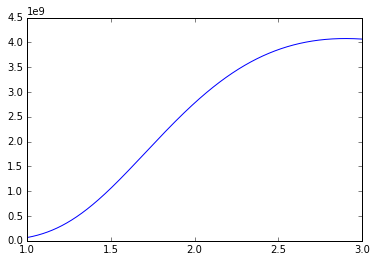

In [17]:
plt.plot(wavelengths2, planck2(wavelengths2, 1000))

---- 

Here we make a function that multiplies these two together called __planck_and_data__. We use the __interpolate__ tool to match y values of data to our indicated x value; in this case, we will input the actual data into this. Once we have the desired data point, we multiply it by the intensity value at the same wavelengh. 

In [18]:
## this function will multiply our actual data by our blackbody curve, i.e. the two functions seen above 

def planck_and_data(x, y, T):
    
    f = interpolate.interp1d(x, y)   
    
    intensity_array = []
    
    for i in x:
        intensity = (planck2(i, T))*f(i)
        intensity_array = np.append(intensity_array, intensity)

    return intensity_array
    

Let's see what this curve looks like using the H-band once again as an example. This is a plot of the two plots above multiplied together. 

And, since our goal is to then integrate it, we can use the __trapz__ tool to do so. 

49090738769.902855

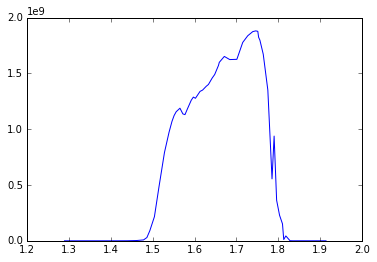

In [19]:
## here are the two curves multiplied together for 1000 K

H = planck_and_data(H_wav, H_rsr, 1000)

plt.plot(H_wav, H)

np.trapz(H)

----

Putting this all together, we're going to be doing nearly the same thing we did in the ideal_mag function, only this time, we'll be using the trapz tool to find the area under the planck_and_data curve. 

No need to set the blackbody curve's integral limits since we're integrating over the given curve.

We find the baseline flux __flux_x__ the same was as before: multiplying the baseline intensity by the range of filter wavelengths. Because this is a property of the filter and we're not changing filters, it makes sense that we shouldn't have to alter this. 

We then create a __flux_array__ and a __magnitude_array__ to collect our blackbody fluxes and corresponding magnitudes. These are arrays because the value changes as temperature change, i.e. each value in the array represents the value at a specific main sequence temperature. 

The __temperature for-loop__ takes in a specified temperature on the main sequence and calculates the flux of the blackbody curve at that temperature over the filter-specific range of wavelengths. This is done by calling the planck_and_data function; then the area underneath it is found using the __trapz__ tool.

And, finally, the __flux for-loop__ takes each flux calculated in the previous for-loop and inputs it into the given magnitude function. 

In [20]:
## defining our actual magnitude function
## this time, we're finding the area under our planck_and_data curve for a range of temperatures on the main sequence 

def actual_mag(lambda_eff, halfwidth, I0, wav, rsr, temps):        ## it takes in the following arguments for certain filters
     
    flux_x = I0*2*halfwidth*1e-2                   ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
    
    flux_array = []                               ## just defining an array to put our calculated fluxes in
    magnitude_array = []                          ## and one for our magnitudes as well 
    
    for t in temperatures: 
        flux = np.trapz(planck_and_data(wav, rsr, t))   ## trapz takes the integral from a to b, and I called the planck_and_data function because that's what we're integrating 
        flux_array = np.append(flux_array, flux)      ## this collects our flux values in an array
        
    for f in flux_array:                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
        magnitude_array = np.append(magnitude_array, magnitude)     ## again calculating 
    
    return magnitude_array

----
### _Results and Applications_ 

In [21]:
## for the H-band filter

lambda_eff, halfwidth, I0 = getfilter('H')

H_mag = actual_mag(lambda_eff, halfwidth, I0, H_wav, H_rsr, temperatures) 


In [22]:
## for the J-band filter

lambda_eff, halfwidth, I0 = getfilter('J')

J_mag = actual_mag(lambda_eff, halfwidth, I0, J_wav, J_rsr, temperatures) 

In [23]:
## for the K-band filter 

lambda_eff, halfwidth, I0 = getfilter('Ks')

K_mag = actual_mag(lambda_eff, halfwidth, I0, K_wav, K_rsr, temperatures) 


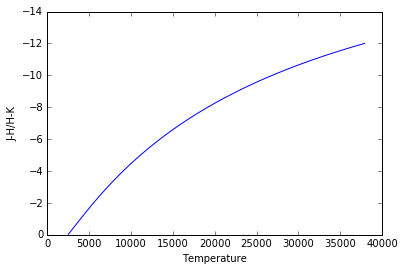

In [24]:
J_minus_H = J_mag - H_mag
H_minus_K = H_mag - K_mag

JH_HK = (J_minus_H)/(H_minus_K)

plt.plot(temperatures, JH_HK)
plt.ylabel('J-H/H-K')
plt.xlabel('Temperature')
plt.gca().invert_yaxis()

-----
## Part 3: The Real Background Source with Dust Extinction


### _Theory and Code_

Say that 

$$ A_{\lambda} = - 2.5 \log \frac{F_{\lambda}}{F_{\lambda 0}} $$

$$ F_{\lambda} = F_{\lambda 0} 10^{-0.4 A_{\lambda}} $$


And

$$ \Delta m = -2.5 \log \frac{\int W_{\lambda} F_{\lambda} d\lambda}{\int W_{\lambda} F_{\lambda 0}  d\lambda} = -2.5 \log \frac{\int W_{\lambda} F_{\lambda 0} 10^{-0.4A_{\lambda}} d\lambda}{\int W_{\lambda} F_{\lambda 0}  d\lambda} = -2.5 \log \frac{\int 10^{-0.4A_{\lambda}} d\lambda}{\int d\lambda} $$

Where $A_{\lambda}$ is dust extinction, 
$F_{\lambda 0}$ is our baseline flux,
$F_{\lambda}$ is the Planck curve, 
$W_{\lambda}$ is is our observed flux, 
and $\Delta m$ is our change in magnitude from before and after extinction.  

Our next step is to plot the real filter curves including extinction. 


In [43]:
def mag_extinction(lambda_eff, halfwidth, I0):   
    A = []
    num_array = []
    mag_array = []
    
    A = ideal_mag(lambda_eff, halfwidth, I0)
    
    den = halfwidth*2*1e-6
    
    for a in A:
        num = 10**(-0.4*a)
        num_array = np.append(num_array, num) 
        
    for n in num_array: 
        mag = -2.5*np.log10(n/den)
        mag_array = np.append(mag_array, mag)   
    
    return mag_array
    


### _Results and Applications_


In [70]:
lambda_eff, halfwidth, I0 = getfilter('Ks')

K_ext = mag_extinction(lambda_eff, halfwidth, I0)

In [71]:
lambda_eff, halfwidth, I0 = getfilter('H')

H_ext = mag_extinction(lambda_eff, halfwidth, I0)

In [72]:
lambda_eff, halfwidth, I0 = getfilter('J')

J_ext = mag_extinction(lambda_eff, halfwidth, I0)

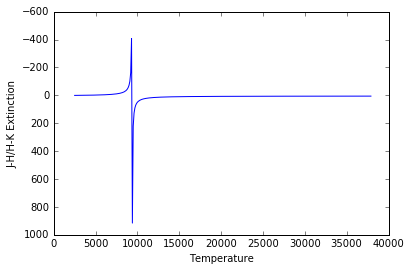

In [73]:
J_H_ext = J_ext - H_ext
H_K_ext = H_ext - K_ext

JH_HK_ext = (J_H_ext)/(H_K_ext)

plt.plot(temperatures, JH_HK_ext)
plt.ylabel('J-H/H-K Extinction')
plt.xlabel('Temperature')
plt.gca().invert_yaxis()